In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
class Graph:
    def __init__(self, n_cities):
        self.n_cities = n_cities
        self.routes = {}
        self.cities = list(range(n_cities))
        self.init_graph()
        
    def exists(self, src, dest):
        if (src,dest) in self.routes:
            return True
        return False
    
    def init_graph(self):
        for i in range(self.n_cities):
            for j in range(self.n_cities):
                if i!=j:
                    cost = random.randint(10, 100)
                    self.add_edge(i, j, cost)

    def add_edge(self, src, dest, cost):
        self.routes[(src,dest)] = cost

    def display_graph(self):
        for route in self.routes:
            print(f"{route[0]} -> {route[1]}: {self.routes[route]}")
    
    def get_cost(self, src, dest):
        if (src,dest) in self.routes:
            return self.routes[(src,dest)]
    
    def generate_random_path(self, population):
        while True:
            sample = random.sample(self.cities, self.n_cities)
            if sample not in population:
                return sample

In [3]:
class Particle:
    def __init__(self, position):
        self.position = position
        self.fitness = 0
        self.best_position = self.position
        self.best_fitness = self.fitness
        self.is_best = True

    # Evaluate fitness of the particle and set best fitness and position(local min)
    def evaluate_fitness(self, graph):
        cost = 0
        for i in range(0,len(self.position)-1):
            cost += graph.get_cost(self.position[i], self.position[i+1])
        self.fitness = math.inf if cost == 0 else 1/cost
        if self.fitness > self.best_fitness:
            self.best_fitness = self.fitness
            self.best_position = self.position
            self.is_best = True
        else:
            self.is_best = False

In [4]:
class Swarm:
    def __init__(self, options, graph, max_population):
        self.dimension = graph.n_cities
        self.n_particles = max_population
        self.population = []
        self.best_particle = None
        self.options = options
        self.graph = graph
        self.fitness_graph = []
        self.generate_population()

    # Generate initial swarm population
    def generate_population(self):
        self.population = []
        for i in range(self.n_particles): 
            position = self.graph.generate_random_path(self.population)
            self.population.append(Particle(position))
        self.best_particle = random.choice(self.population)

    # Evaluate Fitness of the swarm and set best pasition of the swarm (global max)
    def evaluate_fitness(self):
        for particle in self.population:
            particle.evaluate_fitness(self.graph)
            if particle.is_best:
                if particle.fitness > self.best_particle.fitness:
                    self.best_particle = particle
        self.fitness_graph.append(1/self.best_particle.fitness)
        print(f"\nGlobal Best Particle: {self.best_particle.position}, Fitness: {1/self.best_particle.fitness}")
    
    # Function to implement position swaps
    def swap(self, best, current, probability):
        for i in range(len(best)):
            if best[i] != current[i]:
                if probability >= np.random.uniform(0,1):
                    swap_index = best.index(current[i])
                    current[i], current[swap_index] = current[swap_index], current[i]
        return current
            
    # Update position of the particles in the swarm
    def update_swarm(self):
        global_best_position = self.best_particle.position
        for particle in self.population:
            local_best_solution = particle.best_position
            if not particle.is_best:
                particle.position = self.swap(local_best_solution, particle.position, self.options['alpha'])
            if global_best_position != particle.position:
                particle.position = self.swap(global_best_position, particle.position, self.options['beta'])
        
    # Check for termination
    def terminate(self):
        if len(self.fitness_graph) > 10:
            if len(set(self.fitness_graph[-10:])) == 1:
                return True
        return False
            
    # Plotting graph to show fitness trend
    def plot_graph(self):
        plt.plot(self.fitness_graph)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Best particle fitness")

In [5]:
def optimize(max_iter=100, max_population=1000):
    graph = Graph(100)
    options = { 'alpha': 0.8, 'beta': 0.2 }
    swarm = Swarm(options, graph, max_population)
    for i in range(max_iter):
        swarm.evaluate_fitness()
        if swarm.terminate():
            break
        swarm.update_swarm()
    swarm.plot_graph()


Global Best Particle: [7, 97, 43, 33, 53, 63, 75, 89, 14, 90, 30, 16, 95, 39, 44, 50, 46, 60, 51, 54, 71, 29, 56, 81, 11, 13, 45, 72, 85, 34, 59, 65, 26, 96, 4, 76, 55, 48, 98, 64, 9, 88, 8, 23, 82, 68, 22, 78, 38, 24, 47, 25, 36, 84, 49, 80, 21, 73, 61, 91, 0, 67, 87, 92, 74, 32, 69, 6, 58, 1, 57, 31, 83, 10, 42, 3, 27, 12, 79, 86, 94, 35, 37, 19, 40, 5, 93, 41, 70, 18, 62, 99, 15, 52, 28, 20, 77, 66, 2, 17], Fitness: 4667.0

Global Best Particle: [74, 90, 43, 24, 36, 63, 59, 65, 88, 3, 7, 89, 95, 39, 42, 49, 38, 92, 62, 20, 71, 84, 50, 12, 21, 67, 96, 66, 23, 75, 98, 56, 8, 83, 34, 5, 55, 45, 9, 54, 26, 30, 60, 80, 82, 19, 72, 14, 2, 47, 10, 78, 69, 48, 13, 53, 16, 73, 76, 91, 0, 32, 87, 46, 29, 61, 94, 6, 58, 68, 51, 31, 27, 81, 4, 44, 1, 25, 77, 86, 17, 35, 37, 99, 33, 52, 97, 41, 70, 18, 79, 15, 64, 11, 28, 85, 40, 57, 22, 93], Fitness: 4461.0

Global Best Particle: [74, 90, 43, 24, 36, 63, 59, 65, 88, 3, 7, 89, 95, 39, 42, 49, 38, 92, 62, 20, 71, 84, 50, 12, 21, 67, 96, 66, 23, 


Global Best Particle: [29, 46, 43, 85, 12, 81, 41, 21, 49, 3, 87, 98, 95, 89, 52, 94, 37, 79, 80, 20, 71, 84, 13, 97, 50, 67, 66, 53, 11, 75, 90, 7, 35, 83, 39, 5, 55, 45, 9, 54, 34, 32, 64, 22, 82, 36, 72, 14, 8, 24, 61, 4, 63, 48, 15, 47, 16, 73, 76, 91, 0, 60, 65, 59, 74, 96, 17, 6, 25, 1, 51, 31, 70, 27, 2, 44, 26, 58, 77, 23, 56, 92, 69, 99, 33, 86, 10, 88, 38, 18, 19, 42, 68, 40, 28, 62, 30, 57, 78, 93], Fitness: 3576.0

Global Best Particle: [29, 5, 43, 62, 12, 81, 41, 21, 49, 3, 87, 98, 95, 89, 52, 94, 37, 79, 8, 20, 71, 84, 13, 97, 50, 67, 26, 53, 11, 75, 90, 7, 35, 83, 39, 92, 55, 45, 9, 54, 34, 47, 64, 22, 82, 36, 72, 14, 46, 24, 61, 4, 63, 48, 15, 78, 16, 73, 76, 91, 0, 60, 65, 59, 74, 96, 17, 6, 25, 1, 51, 31, 19, 66, 2, 44, 80, 58, 77, 85, 56, 32, 69, 99, 33, 86, 10, 88, 38, 18, 40, 42, 68, 27, 28, 70, 30, 57, 23, 93], Fitness: 3496.9999999999995

Global Best Particle: [39, 37, 43, 85, 12, 81, 41, 21, 49, 3, 87, 98, 95, 89, 52, 94, 46, 53, 80, 20, 71, 84, 13, 97, 50, 67,


Global Best Particle: [39, 37, 43, 62, 12, 81, 41, 21, 80, 3, 87, 98, 95, 89, 52, 94, 46, 79, 66, 20, 71, 84, 13, 97, 50, 67, 26, 53, 11, 75, 90, 7, 35, 83, 29, 5, 55, 45, 9, 54, 34, 85, 64, 22, 82, 36, 72, 15, 92, 24, 32, 4, 63, 48, 14, 47, 16, 73, 76, 91, 0, 60, 65, 59, 74, 96, 17, 6, 25, 1, 51, 31, 70, 27, 2, 44, 8, 58, 77, 23, 56, 86, 69, 99, 33, 61, 10, 88, 38, 18, 40, 42, 68, 19, 28, 49, 30, 57, 78, 93], Fitness: 2852.0

Global Best Particle: [39, 37, 43, 62, 12, 81, 41, 21, 80, 3, 87, 98, 95, 89, 52, 94, 46, 79, 66, 20, 71, 84, 13, 97, 50, 67, 26, 53, 11, 75, 90, 7, 35, 83, 29, 5, 55, 45, 9, 54, 34, 85, 64, 22, 82, 36, 72, 15, 92, 24, 32, 4, 63, 48, 14, 47, 16, 73, 76, 91, 0, 60, 65, 59, 74, 96, 17, 6, 25, 1, 51, 31, 70, 27, 2, 44, 8, 58, 77, 23, 56, 86, 69, 99, 33, 61, 10, 88, 38, 18, 40, 42, 68, 19, 28, 49, 30, 57, 78, 93], Fitness: 2852.0

Global Best Particle: [39, 37, 43, 62, 12, 81, 41, 21, 80, 3, 87, 98, 95, 89, 52, 94, 46, 79, 66, 20, 71, 84, 13, 97, 50, 67, 26, 53, 11,

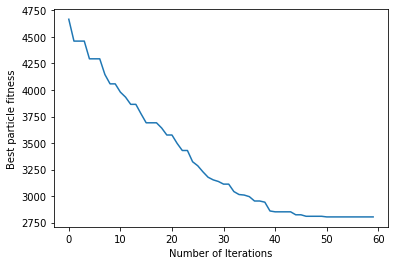

In [6]:
%%time
optimize()